<a href="https://colab.research.google.com/github/Yukti123Ramtani/Runway-royals-project/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
x=np.array([(4,1),(5,4),(6,3),(7,4),(2,-1),(-1,-2),(0,-3),(-1,-4)]).T
def centre(x):
  return x - x.mean(axis=1).reshape(2,1)
d,n=x.shape
x_centered=centre(x)
x_centered



array([[ 1.25,  2.25,  3.25,  4.25, -0.75, -3.75, -2.75, -3.75],
       [ 0.75,  3.75,  2.75,  3.75, -1.25, -2.25, -3.25, -4.25]])

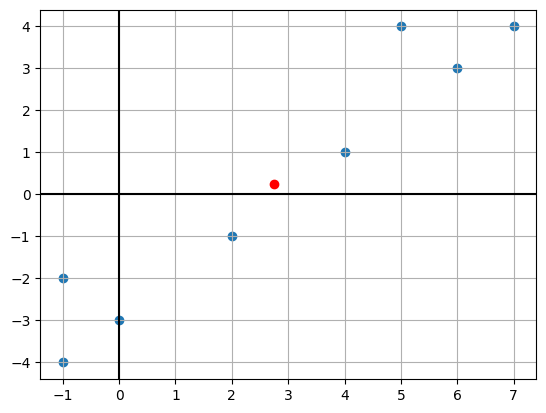

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x[0,:],x[1,:])
plt.axhline(0, color='k')
plt.axvline(0, color='k')

X_mean = x.mean(axis=1)

plt.scatter(X_mean[0], X_mean[1],c='r')
plt.grid()
plt.show()


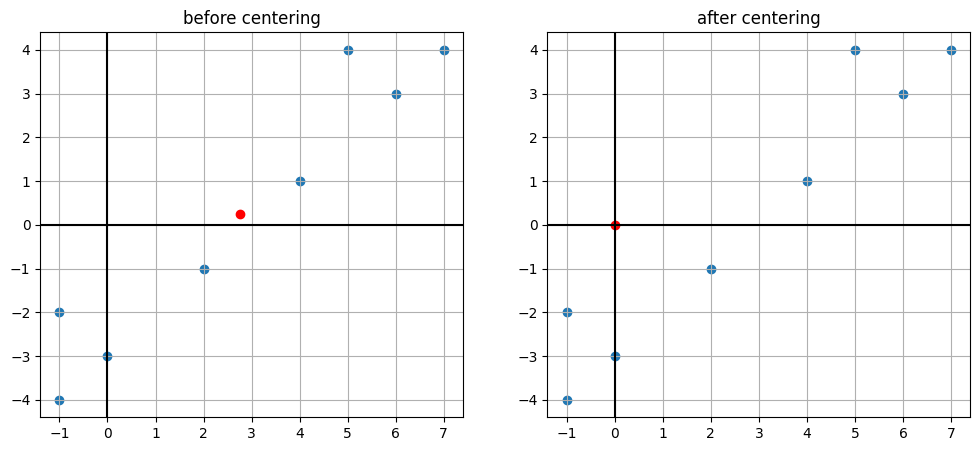

In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.subplot(1,2,1) #creates a first plot in 1x2 grids of plots
plt.scatter(x[0,:],x[1,:])
#TO DRAW LINES
plt.axhline(0,color="k") #x-axis
plt.axvline(0,color="k") #y-axis
x_mean=x.mean(axis=1) #mean of each row
plt.scatter(x_mean[0],x_mean[1],color='r') #plot the means
plt.grid()
plt.title("before centering")
plt.subplot(1,2,2)
plt.scatter(x[0,:],x[1,:])
plt.axhline(0,color="k")
plt.axvline(0,color="k")
c_mean=x_centered.mean(axis=1)
plt.scatter(c_mean[0],c_mean[1],color='r') #plot the means
plt.grid()
plt.title("after centering")
plt.show()




In [5]:
x_centered

array([[ 1.25,  2.25,  3.25,  4.25, -0.75, -3.75, -2.75, -3.75],
       [ 0.75,  3.75,  2.75,  3.75, -1.25, -2.25, -3.25, -4.25]])

**Covariance matrix**
the covariance matrix is given by     
$$\mathbf{C} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{x}_i \mathbf{x}_i^T= \frac{1}{n} \mathbf{X} \mathbf{X}^T$$
    




In [18]:
def covariance(x):
  return x @ x.T/x.shape[1]
c=covariance(x_centered)
d=c.shape[0]
print(c)

[[8.9375 8.5625]
 [8.5625 8.9375]]


**Compute the principal components**

the ${k}^{th}$ principal component is given by eighen vector corresponding  to ${k}^{th}$ largest eighen value

In [21]:
def compute_pc(C):
  d=C.shape[0]
  eig_val,eig_vec=np.linalg.eig(C)
  w1,w2=eig_vec[:,-1],eig_vec[:,-2]
  return w1,w2
w1,w2=compute_pc(c)
w1=w1.reshape(w1.shape[0],1)
w2=w2.reshape(w2.shape[0],1)
print("first pricipal component:\n",w1)
print("second principal component:\n",w2)


first pricipal component:
 [[-0.70710678]
 [ 0.70710678]]
second principal component:
 [[0.70710678]
 [0.70710678]]


**Reconstruction using 2 pcs**


The scalar projection of ${k}^{th}$ is given by ${X}^{t}_{centered}$ . ${W}^{K}$
The vector projection of ${k}^{th}$ is given by ${w}_{k}$ .$({X}^{t}_{centered}.{w}^{k})^{T}$


In [23]:
w1 @ (x_centered.T @ w1).reshape(1,n) + w2@(x_centered.T @ w2).reshape(1,n) # since the points are 2-dimensional ,
#by combining the projections on 2 datasets  we get back the centered dataset

array([[ 1.25,  2.25,  3.25,  4.25, -0.75, -3.75, -2.75, -3.75],
       [ 0.75,  3.75,  2.75,  3.75, -1.25, -2.25, -3.25, -4.25]])

**Let us see reconstruction error for a point along first principal component**


In [41]:
# reconstruction error by first pc is given by
x1=np.array([1.25,.75])
p1=x_centered[:,0]
#Let the reconstruction error of first point using first pc is given by
p2=w1 @ (x_centered[:,0].T @ w1)
print("The reconstruction error with first pc is  "+str(np.sum(np.square(p1-p2))))



The reconstruction error with first pc is  2.0


**The reconstruction error for entire dataset along first principal component will be**


In [45]:
#reconstruction error for each point when considering first principal component
rec_error_1=np.square(np.linalg.norm(x_centered[:,]-(w1 @ (x_centered.T @ w1).reshape(1,n))[:,],axis=0))
rec_error_1

array([ 2., 18., 18., 32.,  2., 18., 18., 32.])

In [31]:
print("The reconstruction error along first principal component is",str(np.round((rec_error_1).mean(),4)))

The reconstruction error along first principal component is 17.5


*The reconstruction error for entire dataset along* **w,** will be


In [46]:
wr=np.array([0,1]).reshape(-1,1) #i have 8 elements in an array will result in a 8*1 vector

In [36]:
rec_error_r=np.square(np.linalg.norm(x_centered[:,]-(wr @ (x_centered.T @ wr).reshape(1,n))[:,],axis=0))
print("error_matrix :",rec_error_r)
print("The reconstruction error along wr is",str((rec_error_r).mean()))

error_matrix [ 1.5625  5.0625 10.5625 18.0625  0.5625 14.0625  7.5625 14.0625]
The reconstruction error along wr is 8.9375
